# Computergestützte Mathematik zur Analysis

29.11.2018

In [1]:
from sympy import *
init_printing()
import numpy as np
%matplotlib qt
import matplotlib.pyplot as plt; 

konkrete Polynome

In [2]:
x = Symbol('x')
n = 8
p = 0
for j in range(n):
    p += (-x)**j / factorial(j)
p

In [3]:
degree(p)

In [8]:
p.coeff(x, 5)

Plots

In [9]:
xn = np.linspace(-2, 5)

In [10]:
wn = [p.subs(x, xx) for xx in xn]

In [11]:
    plt.plot(xn, wn);

aus `sympy` Funktionen können universale Funktionen generiert werden

In [12]:
x = Symbol('x')
fn = lambdify(x, p, 'numpy')

In [13]:
plt.plot(xn, fn(xn));

Grenzwerte

In [14]:
x = Symbol('x')
n = Symbol('n', integer=True)

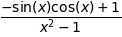

In [15]:
f = (1-cos(x)*sin(x)) / (x**2-1)
f

In [17]:
limit(f, x, 1)

In [18]:
tan(pi/2)

In [19]:
limit(tan(x), x, pi/2)

In [20]:
limit(tan(x), x, pi/2, dir='-')

In [22]:
#limit(tan(x), x, pi/2, dir='+-')
# ValueError

In [23]:
a = (1 - cos(pi*(n+1/n)) * cos(3*pi*(n-1/n))) * n**2
a

In [24]:
limit(a, n, oo)

Das bedeutet:  Alle Häufungswerte sind $\ge 0$.

Man muss ein bisschen helfen:

In [25]:
a1 = a.expand(trig=True)
a1

So wird die Annahme bzgl. $n$ genutzt.

In [26]:
limit(a1, n, oo)

In [27]:
a = factorial(n) * (exp(1)/n)**n / sqrt(n)
a

In [28]:
limit(a, n, oo)

Stirlingsche Formel

In [29]:
y = Symbol('y')

In [30]:
def f(x):
    return x*cos(x**2)

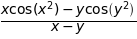

In [31]:
b = (f(x)-f(y)) / (x-y)
b

In [32]:
b.limit(x, y)

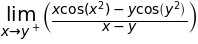

In [33]:
l = Limit(b, x, y)
l

In [34]:
l.doit()

if you really must

In [35]:
from IPython.display import Markdown, display

In [39]:
Markdown("Formel: $${} = {}$$".format(latex(l), latex(l.doit())))

Formel: $$\lim_{x \to y^+}\left(\frac{x \cos{\left (x^{2} \right )} - y \cos{\left (y^{2} \right )}}{x - y}\right) = - 2 y^{2} \sin{\left (y^{2} \right )} + \cos{\left (y^{2} \right )}$$

Da ist aber der *fake math* Tür und Tor geöffnet.

In [42]:
print(latex(l))

\lim_{x \to y^+}\left(\frac{x \cos{\left (x^{2} \right )} - y \cos{\left (y^{2} \right )}}{x - y}\right)


Differentiation

In [43]:
exp(3*x).diff(x)

In [45]:
df = f(x).diff(x)
df

In [46]:
ddf = f(x).diff(x, 2)
ddf

In [47]:
dddf = f(x).diff(x, 3)
dddf

In [51]:
for n in range(7):
    display(f(x).diff(x, n))

Zusammenfassungen

In [54]:
d6f = f(x).diff(x, 6)
d6f += cos(x**2)*sin(x**2)

In [55]:
d6f.expand().collect([cos(x**2), sin(x**2)])

In [56]:
d6f.expand().coeff(sin(x**2))

Partielle Ableitungen

In [57]:
f = exp(x/y)
f

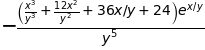

In [58]:
f.diff(x,2, y,3)

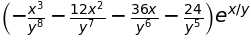

In [59]:
f.diff(x,2,y,3).expand().collect(f)

Integration

In [60]:
f1 = x*exp(-x/3)
f1

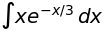

In [61]:
I1 = Integral(f1, x)  # träger Operator
I1

In [62]:
F1 = I1.doit()
F1

In [66]:
F1.diff(x) == f1     

False

Ist aber doch nicht falsch.

In [67]:
(F1.diff(x) - f1).simplify()

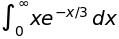

In [68]:
I1b = Integral(f1, (x, 0, oo))
I1b

In [69]:
I1b.doit()

In [70]:
F1.limit(x, oo) - F1.subs(x, 0)

In [71]:
n = Symbol('n')
f2 = x**n

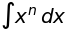

In [72]:
I2 = Integral(f2, x)
I2

In [73]:
I2.doit()

⎧ n + 1            
⎪x                 
⎪──────  for n ≠ -1
⎨n + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

In [74]:
m = Symbol('m', zero=False)
n = m-1

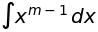

In [75]:
f3 = x**n
I3 = Integral(f3, x)
I3

In [76]:
I3.doit()

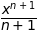

In [77]:
n = Symbol('n')
I3.doit().subs(m, n+1)

Einfacher, aber gefährlich

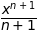

In [78]:
I2.doit(conds="none")

In [79]:
f4 = sqrt(exp(x)+4)
f4

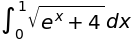

In [80]:
I4 = Integral(f4, (x,0,1))
I4

In [81]:
I4.doit()

Das konnte sympy vor zwei Jahren noch nicht.  Probe:

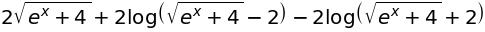

In [82]:
F4 = Integral(f4, x).doit()
F4

In [83]:
F4.subs(x,1) - F4.subs(x,0)

In [84]:
N(I4)

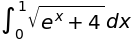

In [86]:
I4

In [85]:
N(I4.doit()) 

In [89]:
%%timeit  
N(I4)
# hier wird numerisch integriert

4.86 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
%%timeit
N(I4.doit())
# hier wird symbolisch integriert und dann numerisch ausgewertet

151 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Die unterliegende Numerik stammt bei `sympy` aus `mpmath`, welches beliebige Präzision erreichen kann.  In der CompLA werden dagegen `numpy` und `scipy` verwandt.

In [92]:
N(I4, 60)

In [91]:
N(I4.doit(), 60)

In [96]:
f5 = exp(-x**2)

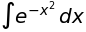

In [94]:
I5 = Integral(f5, x)
I5

In [95]:
I5.doit()

`erf` ist Fehlerfunktion

In [97]:
xn = np.linspace(-3, 3)
fn = lambdify(x, erf(x), 'numpy')
plt.plot(xn, fn(xn));

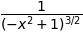

In [98]:
f7 = (1 - x**2)**Rational(-3,2)
f7

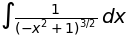

In [99]:
I7 = Integral(f7, x)
I7

In [100]:
F7 = I7.doit(conds='none')
F7

⎧    -ⅈ⋅x           │ 2│    
⎪ ───────────   for │x │ > 1
⎪    ________               
⎪   ╱  2                    
⎪ ╲╱  x  - 1                
⎨                           
⎪      x                    
⎪─────────────   otherwise  
⎪   __________              
⎪  ╱    2                   
⎩╲╱  - x  + 1               

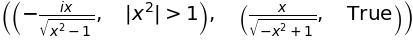

In [101]:
F7.args

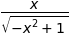

In [102]:
F7a = F7.args[1][0]
F7a

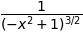

In [103]:
F7a.diff(x).simplify()

In [104]:
I7a = Integral(f7, (x, Rational(-1,2), Rational(1,2)))
I7a.doit()

In [105]:
F7a.subs(x,Rational(1,2)) - F7a.subs(x, Rational(-1,2))

2016 war die Stammfunktion noch falsch.

In [106]:
f8 = 1 / (2 - cos(2*x))

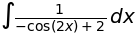

In [107]:
I8 = Integral(f8, x)
I8

In [109]:
F8 = I8.doit()
F8

In [110]:
I8a = Integral(f8, (x, 0, 2*pi))
I8a.doit() 

In [112]:
F8n = lambdify(x, F8, 'numpy')
xn = np.linspace(0, 2*np.pi)
plt.plot(xn, F8n(xn));

In [114]:
F8.subs(x, 2*pi) - F8.subs(x, 0)

In [115]:
print(F8)

sqrt(3)*(atan(sqrt(3)*tan(x)) + pi*floor((x - pi/2)/pi))/3


In [116]:
def null(x):
    return 0

In [117]:
a = F8.replace(floor, null)  # replace ist mächtiger als subs
a

In [118]:
F8n2 = lambdify(x, a, 'numpy')
plt.plot(xn, F8n2(xn));

Der `floor`-Term hebt die Sprünge auf